In [1]:
# Importing Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

| Column Name   | Description                                                                |
| ------------- | -------------------------------------------------------------------------- |
| `survived`    | Survival (0 = No, 1 = Yes) – **target variable**                           |
| `pclass`      | Passenger class (1 = First, 2 = Second, 3 = Third)                         |
| `sex`         | Gender of the passenger (`male` or `female`)                               |
| `age`         | Age of the passenger (in years)                                            |
| `sibsp`       | Number of siblings/spouses aboard the Titanic                              |
| `parch`       | Number of parents/children aboard the Titanic                              |
| `fare`        | Fare paid for the ticket                                                   |
| `embarked`    | Port of embarkation (`C` = Cherbourg, `Q` = Queenstown, `S` = Southampton) |
| `class`       | Duplicate of `pclass` but as a string (`First`, `Second`, `Third`)         |
| `who`         | Broad categorization: `man`, `woman`, or `child`                           |
| `adult_male`  | Boolean indicating whether the passenger is an adult male                  |
| `deck`        | Deck level (A–G or NaN if unknown)                                         |
| `embark_town` | Full name of the embarkation town                                          |
| `alive`       | Duplicate of `survived`, but as `yes` or `no`                              |
| `alone`       | Boolean indicating whether the passenger was alone (no family aboard)      |


In [2]:
# creating the function to load and describe the data
def  load_and_describe(file_name):
    try:
        data = pd.read_csv(file_name)
        print(f'Loaded the data {file_name} Successfully.')
        print('\nData Head:')
        display(data.head())
        
        print('\nBasic Information:')
        display(data.info())
        
        print('\nSummary Statistics:')
        display(data.describe())
        
        print('\nSkewness:')
        display(data.skew(numeric_only= True))
        
        print('\nKurtosis:')
        display(data.kurt(numeric_only= True))
        return data
    except Exception as e:
        print(f'Error Loading dataset: {e}')
        return None

In [3]:
data = load_and_describe('Titanic.csv')

Loaded the data Titanic.csv Successfully.

Data Head:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True



Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


None


Summary Statistics:


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



Skewness:


survived      0.478523
pclass       -0.630548
age           0.389108
sibsp         3.695352
parch         2.749117
fare          4.787317
adult_male   -0.420431
alone        -0.420431
dtype: float64


Kurtosis:


survived      -1.775005
pclass        -1.280015
age            0.178274
sibsp         17.880420
parch          9.778125
fare          33.398141
adult_male    -1.827345
alone         -1.827345
dtype: float64

cleaning anf preprocessing

In [49]:
# creating the method to clean data
def clean_data(data):
    print('Checking for duplicate values: ')
    print(f'Duplicate Values: {data.duplicated().sum()}')
    data = data.drop_duplicates()
    print(f'Duplicates Removed. Removing Rows: {len(data)}')

    # Handling the missing values
    print('\nChecking missing Values: ')
    print(round(data.isnull().sum()/len(data)*100,2))
    print('handling missing Values:')
    data = data.fillna(value= {'age': data['age'].mean(),
                                'deck': 'unknown',
                                'embarked': data['embarked'].mode()[0],
                                'embark_town':data['embark_town'].mode()[0]})
    print('Missing Values filled.')
    print(f'\nRow count after missing values imputation: \n{round(data.isnull().sum()/len(data)*100,2)}')
    
    # Checking and Handling outliers
    print('\nOutliers detection And Treatment:')
    numeric_data =  data.select_dtypes(include= np.number)
    for col in numeric_data.columns:
        Q1 = data[col].quantile(0.25)
        Q2 = data[col].quantile(0.5)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        LW = Q1 - (1.5 * IQR)
        UW = Q3 + (1.5 * IQR)
        outliers = ((data[col] < LW) | (data[col] > UW))
        # print(f'\nOutliers for {col}: \n {outliers}')
        if outliers.sum() > 0:
            print(f'{col} has {outliers.sum()/len(outliers)*100:.2f}% outliers')
        else:
            print(f'{col} does not have any outliers.')
            
        # outliers Treatment
        data.loc[(data[col] < LW) | (data[col] > UW), col] = Q2
    return data

In [5]:
data = clean_data(data)

Checking for duplicate values: 
Duplicate Values: 107
Duplicates Removed. Removing Rows: 784

Checking missing Values: 
survived        0.00
pclass          0.00
sex             0.00
age            13.52
sibsp           0.00
parch           0.00
fare            0.00
embarked        0.26
class           0.00
who             0.00
adult_male      0.00
deck           74.23
embark_town     0.26
alive           0.00
alone           0.00
dtype: float64
handling missing Values:
Missing Values filled.

Row count after missing values imputation: 
survived       0.0
pclass         0.0
sex            0.0
age            0.0
sibsp          0.0
parch          0.0
fare           0.0
embarked       0.0
class          0.0
who            0.0
adult_male     0.0
deck           0.0
embark_town    0.0
alive          0.0
alone          0.0
dtype: float64
survived does not have any outliers.
pclass does not have any outliers.
age has 4.97% outliers
sibsp has 4.97% outliers
parch has 1.91% outliers
fare has 13.

Identifying trands

In [6]:
def identifying_Trends(data):
    # Bar chart
    sns.countplot(x = 'survived', data=data)
    plt.xlabel('Survival Status')
    plt.ylabel('Count')
    plt.title('Survival Count')
    plt.show()
    
    # Histogram
    plt.hist(data['age'], bins=10)
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.title('Distribution of Age')
    plt.show()
    
    # Scatter plot
    plt.scatter(data['age'], data['fare'])
    plt.xlabel('Age')
    plt.ylabel('Fare')
    plt.title('Age vs. Fare')
    plt.show()
    
    # Box Plot
    sns.boxplot(x = data['survived'], y = data['fare'])
    plt.xlabel('Survival status')
    plt.ylabel('Fare')
    plt.title('Survival status vs. Fare')
    plt.show()
    
    numeric_data = data.select_dtypes(include = np.number)
    if len(numeric_data.columns) >= 2:
        plt.figure(figsize= (10, 6))
        sns.pairplot(numeric_data, hue='survived', palette='Set2', diag_kind='hist')
        plt.suptitle('Pairplot of Numerical Features', y = 0.012)
        plt.show()

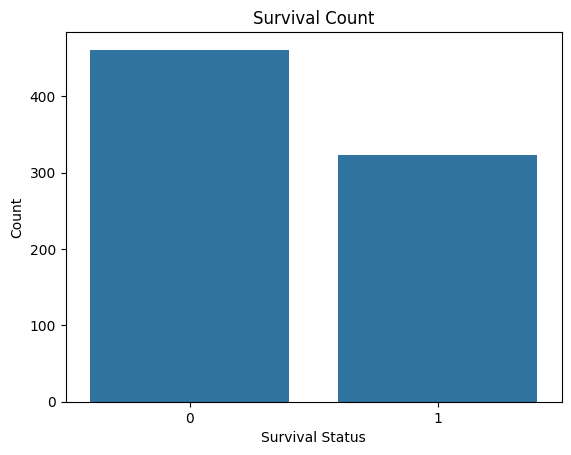

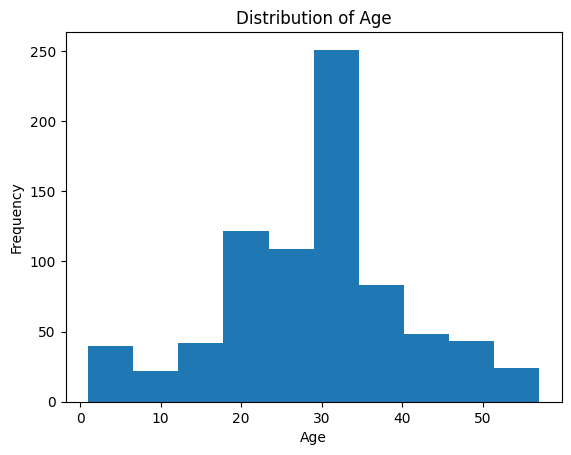

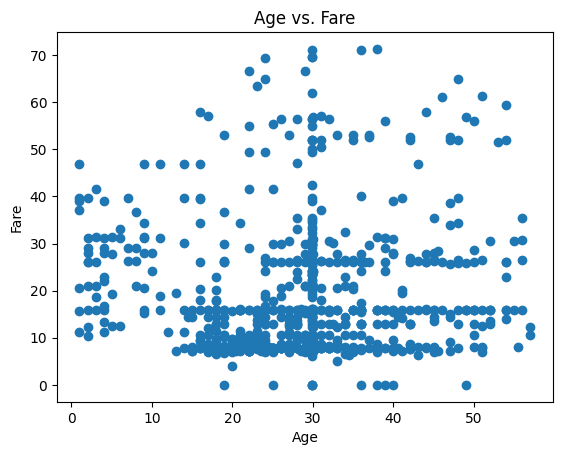

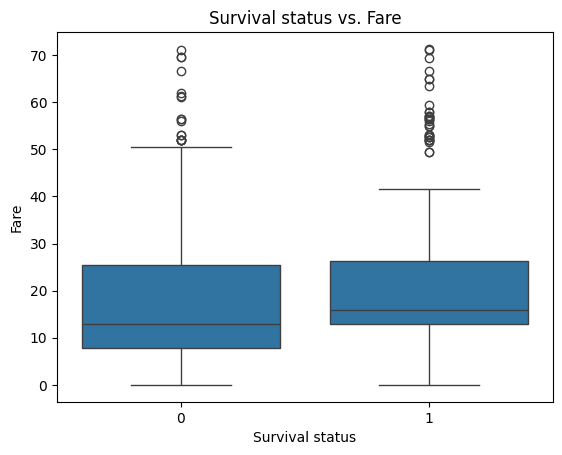

<Figure size 1000x600 with 0 Axes>

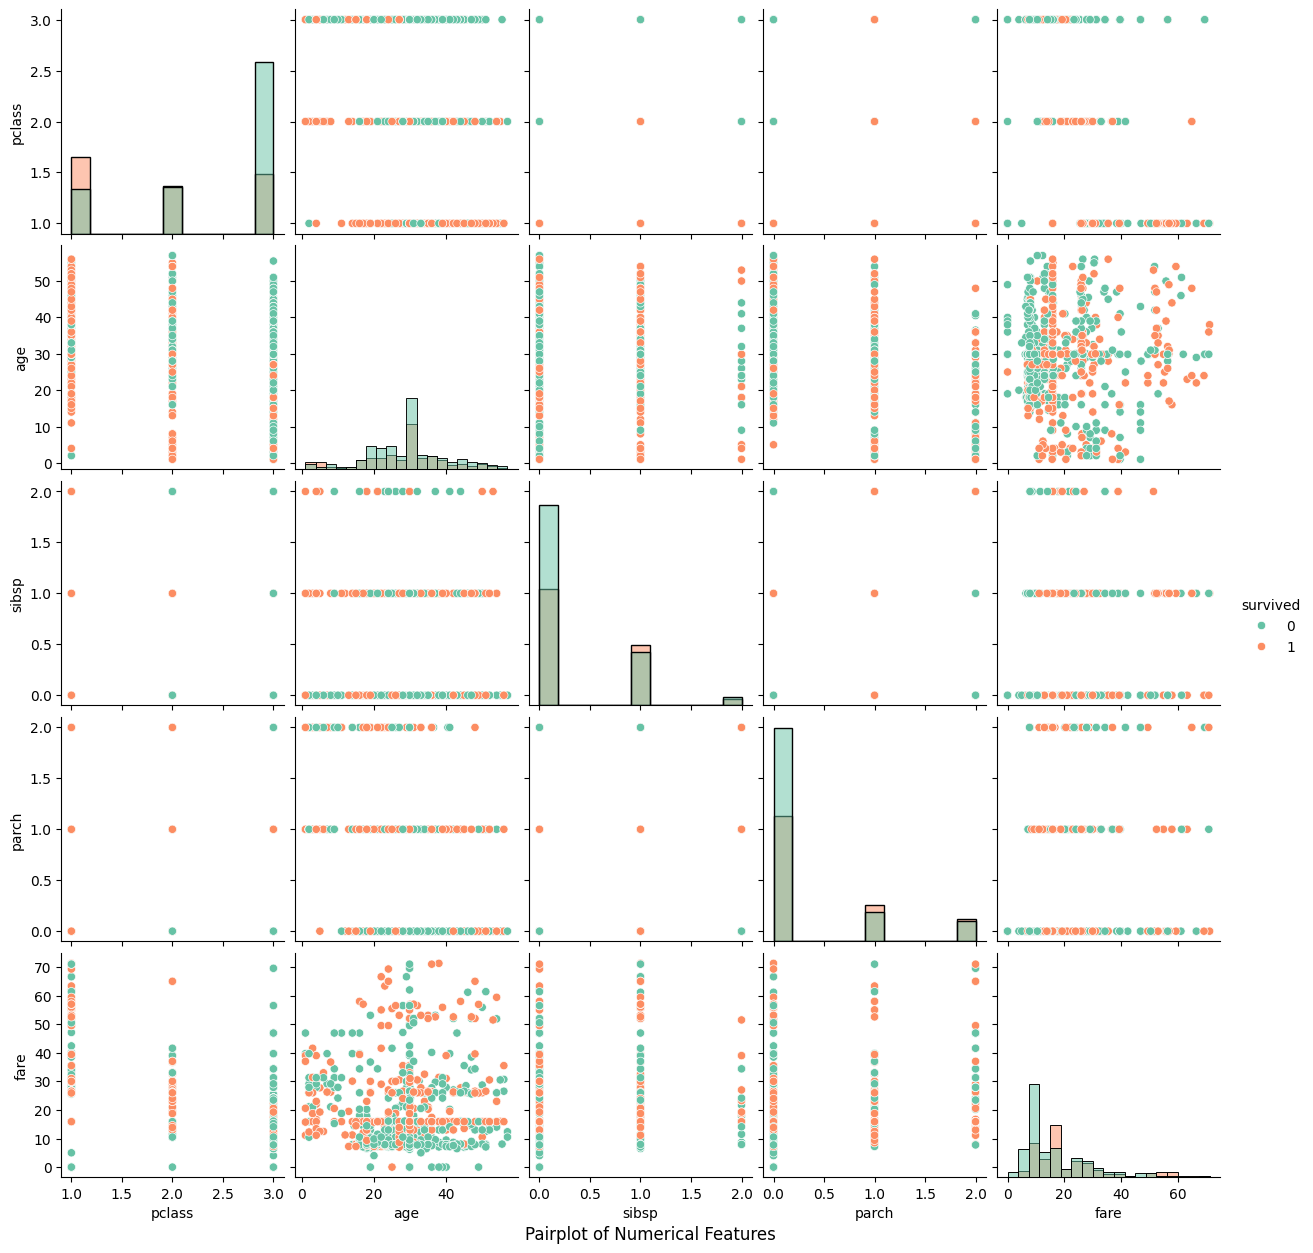

In [7]:
identifying_Trends(data)

### Insights From the data:
General Observation:
1. the orange points (Survived = 1) represent passengers who survived.
2. the green points (Survived = 0) represent passengers who did not survived.

### Survival vs passenger class:
1. Survival has a strong correlation with PClass.
2. Passengers in 1st class (Pclass = 1) had much higher survival rate, as seen by concentration by orange points.
3. passengers in 3rd class (Pclass = 3) had much lower survival rate, as seen by the concentration by green points.

### Survival vs Age:
1. Younger Passenger appear more likely to survive.
2. there's a noticeable concentration of orange points for younger age.
3. Older passenger had mixed survival rates, but survival rates decline among very elderly passenger.

### Sibsp (Sibblings / Spouses) and parch (Parents / child)
1. Survival tends to decrease with an increase in Sibsp and Parch
2. Passengers traviling alone or with one family member (SibSp or parch = 0 or 1) are more likely survive.
3. Larger family groups (higher SbiSp or Parch) show fewer survivors (more green points).

### Survival vs Fare:
1. passengers who paid higher fares are more likely to survive.
2. a clear distinction shows that many survivors (orange points) paid significantly higher fares.
3. lower fares are mostly associated with non-survivors (green points).

### Age and Fare Intraction:
1. Young Passengers Who paid higher Fares have higher survival rate.
2. There's a clustering of non- survivors (Green points) among older passengers who paid lower fares.

### Summery of key insights:
1. class and wealth (pclass and fare) Play a significant role in survival.
2. Family size matters: Smaller families and individual passengers who were traveling alone had better chance of survival.
3. Age: Younger Passengers survived at higher rates.
4. Fare: Higher Fare Generally Indicates higher survival rate.

In [51]:
def generating_Insights():
    print('''### Insights From the data:
General Observation:
1. the orange points (Survived = 1) represent passengers who survived.
2. the green points (Survived = 0) represent passengers who did not survived.

### Survival vs passenger class:
1. Survival has a strong correlation with PClass.
2. Passengers in 1st class (Pclass = 1) had much higher survival rate, as seen by concentration by orange points.
3. passengers in 3rd class (Pclass = 3) had much lower survival rate, as seen by the concentration by green points.

### Survival vs Age:
1. Younger Passenger appear more likely to survive.
2. there's a noticeable concentration of orange points for younger age.
3. Older passenger had mixed survival rates, but survival rates decline among very elderly passenger.

### Sibsp (Sibblings / Spouses) and parch (Parents / child)
1. Survival tends to decrease with an increase in Sibsp and Parch
2. Passengers traviling alone or with one family member (SibSp or parch = 0 or 1) are more likely survive.
3. Larger family groups (higher SbiSp or Parch) show fewer survivors (more green points).

### Survival vs Fare:
1. passengers who paid higher fares are more likely to survive.
2. a clear distinction shows that many survivors (orange points) paid significantly higher fares.
3. lower fares are mostly associated with non-survivors (green points).

### Age and Fare Intraction:
1. Young Passengers Who paid higher Fares have higher survival rate.
2. There's a clustering of non- survivors (Green points) among older passengers who paid lower fares.

### Summery of key insights:
1. class and wealth (pclass and fare) Play a significant role in survival.
2. Family size matters: Smaller families and individual passengers who were traveling alone had better chance of survival.
3. Age: Younger Passengers survived at higher rates.
4. Fare: Higher Fare Generally Indicates higher survival rate.''')

# Visualizing Results

In [8]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,unknown,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,unknown,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,unknown,Southampton,no,True


In [ ]:
correlations = round(data.corr(numeric_only=True)*100,2)

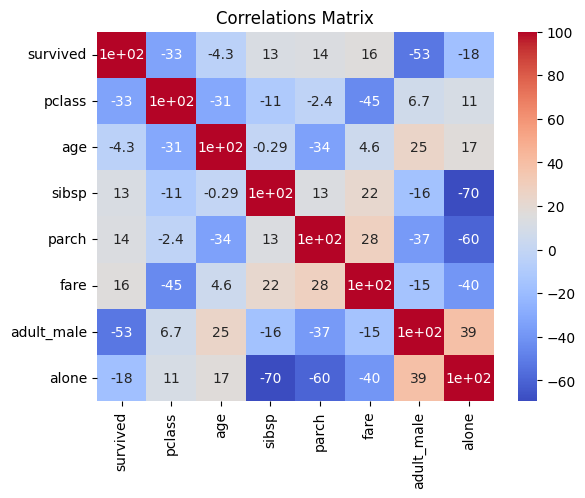

In [15]:
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title('Correlations Matrix')
plt.show()

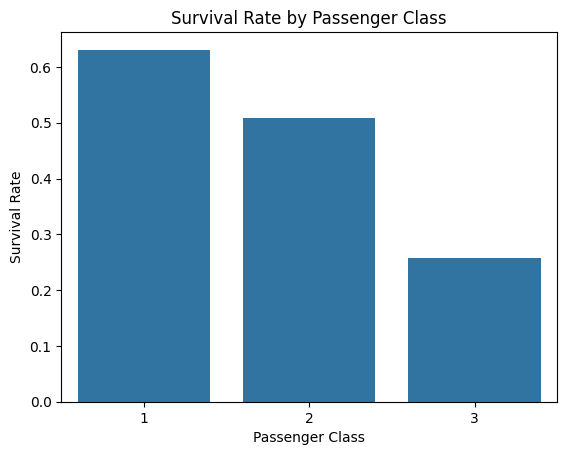

In [24]:
sns.barplot(data=data, x = 'pclass', y = 'survived', errorbar=None)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

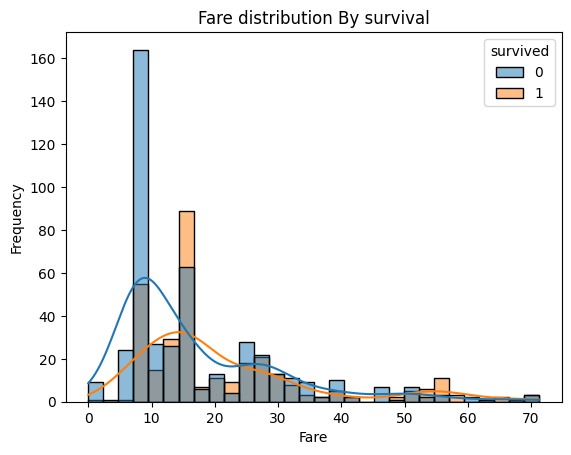

In [30]:
sns.histplot(data = data, x = 'fare', hue='survived', bins=30, kde=True)
plt.title('Fare distribution By survival')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

In [32]:
data['FamilySize'] = data['sibsp'] + data['parch'] + 1
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,FamilySize
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,unknown,Southampton,no,False,2
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,2
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,unknown,Southampton,yes,True,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,2
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,unknown,Southampton,no,True,1


In [33]:
data['FamilySize'].value_counts()

FamilySize
1    452
2    178
3    125
4     25
5      4
Name: count, dtype: int64

Text(0, 0.5, 'Survival Rate')

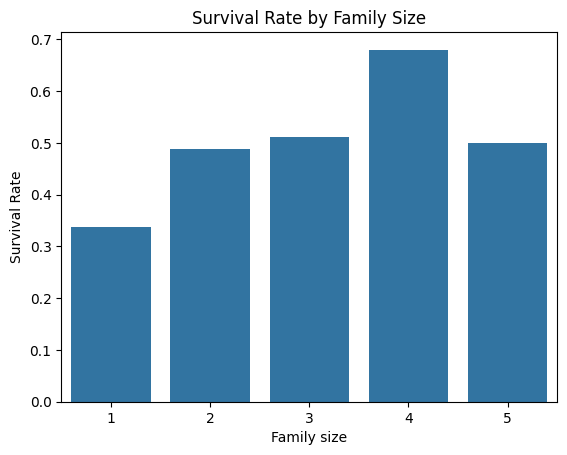

In [36]:
sns.barplot(data = data, x = 'FamilySize', y = 'survived', errorbar=None)
plt.title('Survival Rate by Family Size')
plt.xlabel('Family size')
plt.ylabel('Survival Rate')

Text(0, 0.5, 'Survival Rate')

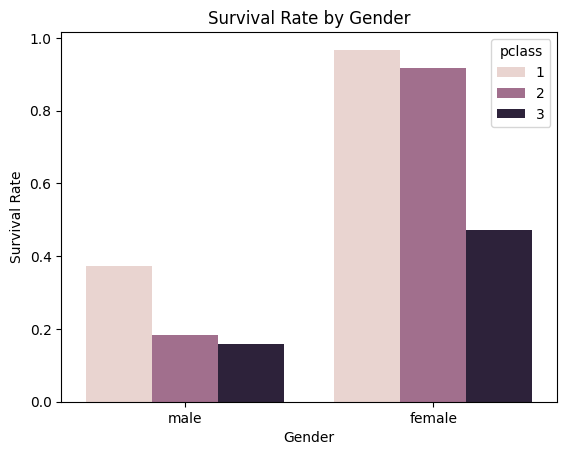

In [38]:
sns.barplot(data = data, x = 'sex', y = 'survived', errorbar=None, hue='pclass')
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')

Text(0, 0.5, 'Survival Rate')

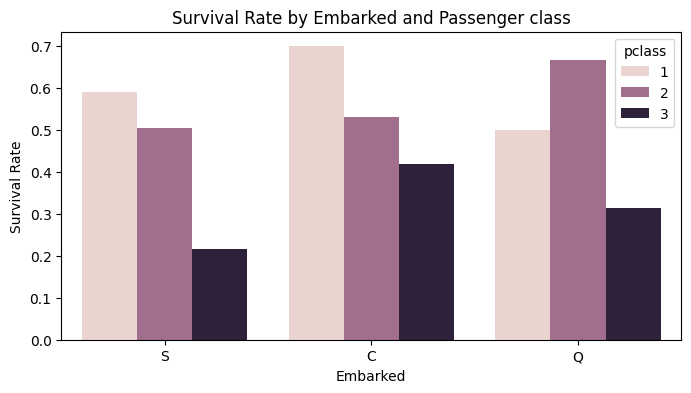

In [41]:
plt.figure(figsize=(8,4))
sns.barplot(data = data, x = 'embarked', y = 'survived', errorbar=None, hue='pclass')
plt.title('Survival Rate by Embarked and Passenger class')
plt.xlabel('Embarked')
plt.ylabel('Survival Rate')

In [43]:
def Visualize_data(data):
    
    # Correlation Analysis
    correlations = round(data.corr(numeric_only=True)*100,2)
    sns.heatmap(correlations, annot=True, cmap='coolwarm')
    plt.title('Correlations Matrix')
    plt.show()
    
    # Pclass Vs survival rate
    sns.barplot(data=data, x = 'pclass', y = 'survived', errorbar=None)
    plt.title('Survival Rate by Passenger Class')
    plt.xlabel('Passenger Class')
    plt.ylabel('Survival Rate')
    plt.show()
    
    # Survival rate By Fare
    sns.histplot(data = data, x = 'fare', hue='survived', bins=30, kde=True)
    plt.title('Fare distribution By survival')
    plt.xlabel('Fare')
    plt.ylabel('Frequency')
    plt.show()
    
    # Family Size Analysis
    data['FamilySize'] = data['sibsp'] + data['parch'] + 1
    sns.barplot(data = data, x = 'FamilySize', y = 'survived', errorbar=None)
    plt.title('Survival Rate by Family Size')
    plt.xlabel('Family size')
    plt.ylabel('Survival Rate')
    
    # Survival Rate By Gender
    sns.barplot(data = data, x = 'sex', y = 'survived', errorbar=None, hue='pclass')
    plt.title('Survival Rate by Gender')
    plt.xlabel('Gender')
    plt.ylabel('Survival Rate')
    
    # Survival rate by Embarked Town
    plt.figure(figsize=(8,4))
    sns.barplot(data = data, x = 'embarked', y = 'survived', errorbar=None, hue='pclass')
    plt.title('Survival Rate by Embarked and Passenger class')
    plt.xlabel('Embarked')
    plt.ylabel('Survival Rate')

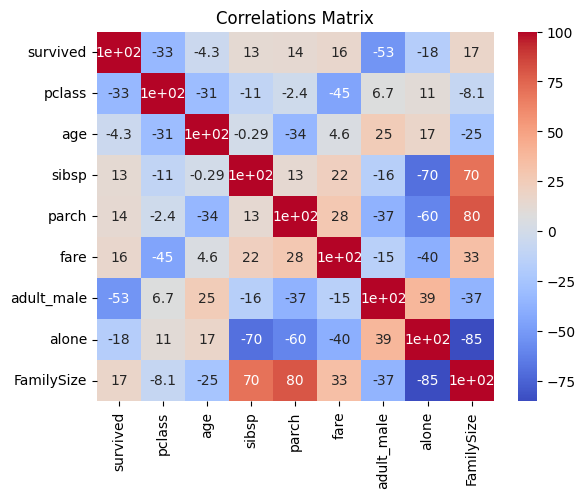

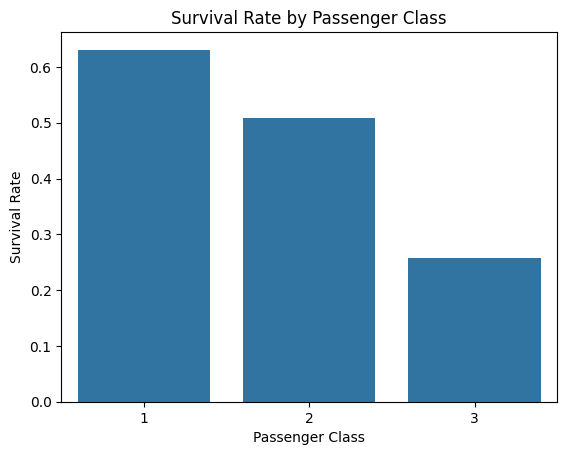

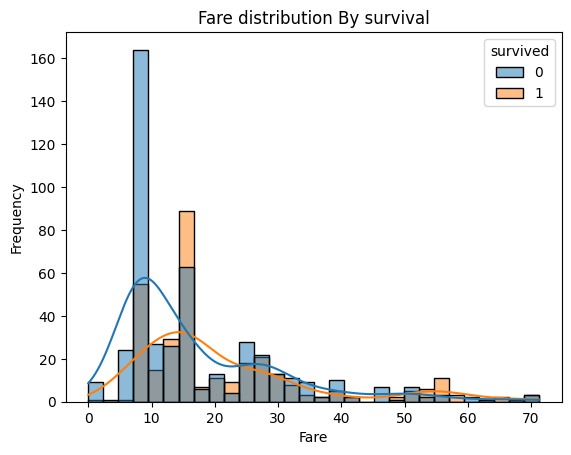

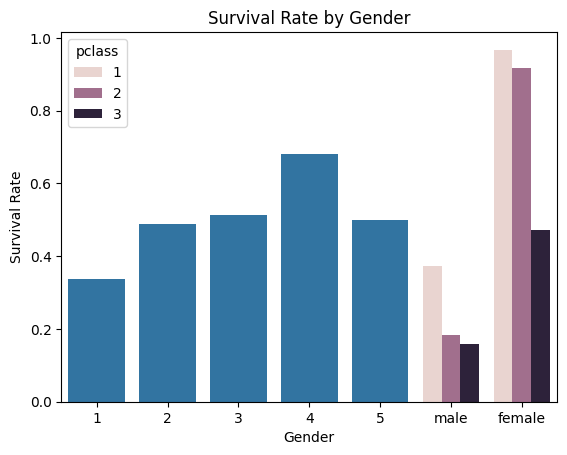

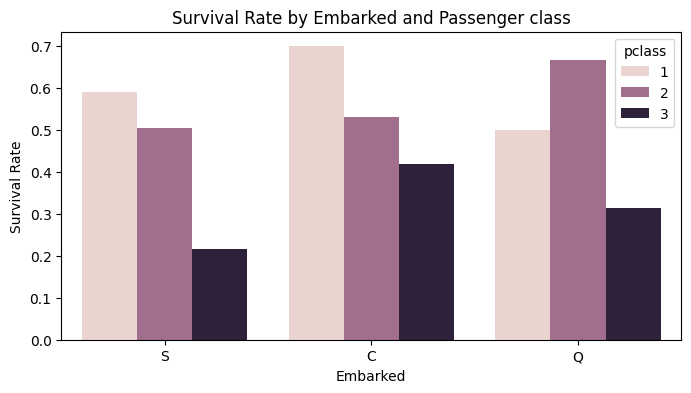

In [44]:
Visualize_data(data)

# Summarizing the Findings

========== Understanding Dataset ==========
Loaded the data Titanic.csv Successfully.

Data Head:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True



Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


None


Summary Statistics:


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



Skewness:


survived      0.478523
pclass       -0.630548
age           0.389108
sibsp         3.695352
parch         2.749117
fare          4.787317
adult_male   -0.420431
alone        -0.420431
dtype: float64


Kurtosis:


survived      -1.775005
pclass        -1.280015
age            0.178274
sibsp         17.880420
parch          9.778125
fare          33.398141
adult_male    -1.827345
alone         -1.827345
dtype: float64

========== Data Cleaning and Preprocessing ==========
Checking for duplicate values: 
Duplicate Values: 107
Duplicates Removed. Removing Rows: 784

Checking missing Values: 
survived        0.00
pclass          0.00
sex             0.00
age            13.52
sibsp           0.00
parch           0.00
fare            0.00
embarked        0.26
class           0.00
who             0.00
adult_male      0.00
deck           74.23
embark_town     0.26
alive           0.00
alone           0.00
dtype: float64
handling missing Values:
Missing Values filled.

Row count after missing values imputation: 
survived       0.0
pclass         0.0
sex            0.0
age            0.0
sibsp          0.0
parch          0.0
fare           0.0
embarked       0.0
class          0.0
who            0.0
adult_male     0.0
deck           0.0
embark_town    0.0
alive          0.0
alone          0.0
dtype: float64

Outliers detection And Treatment:
survived does not have any outliers.
pclass does not have any outlie

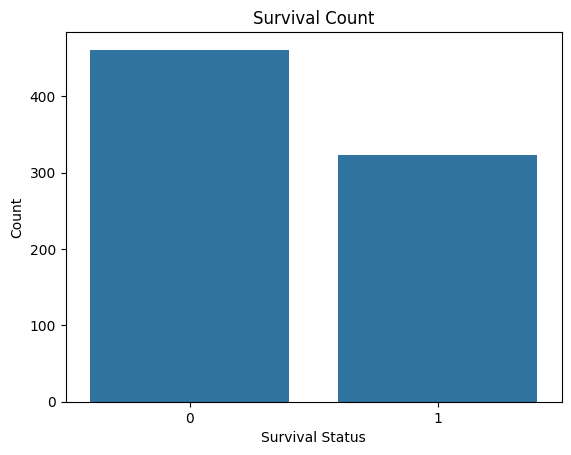

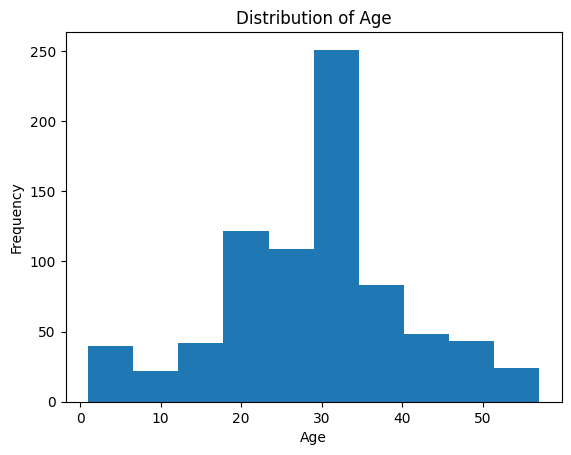

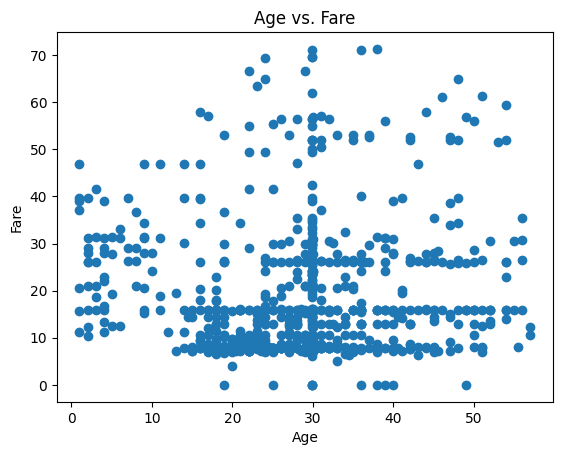

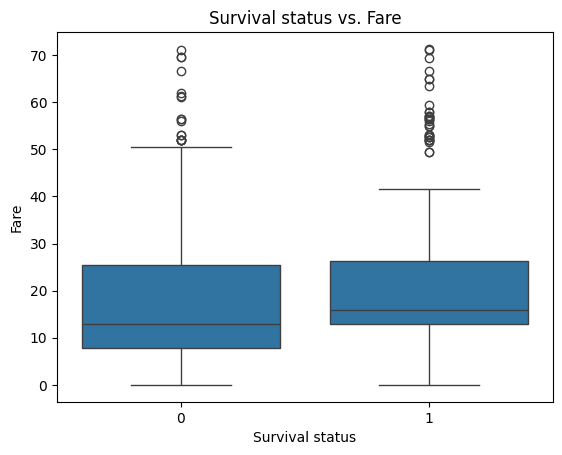

<Figure size 1000x600 with 0 Axes>

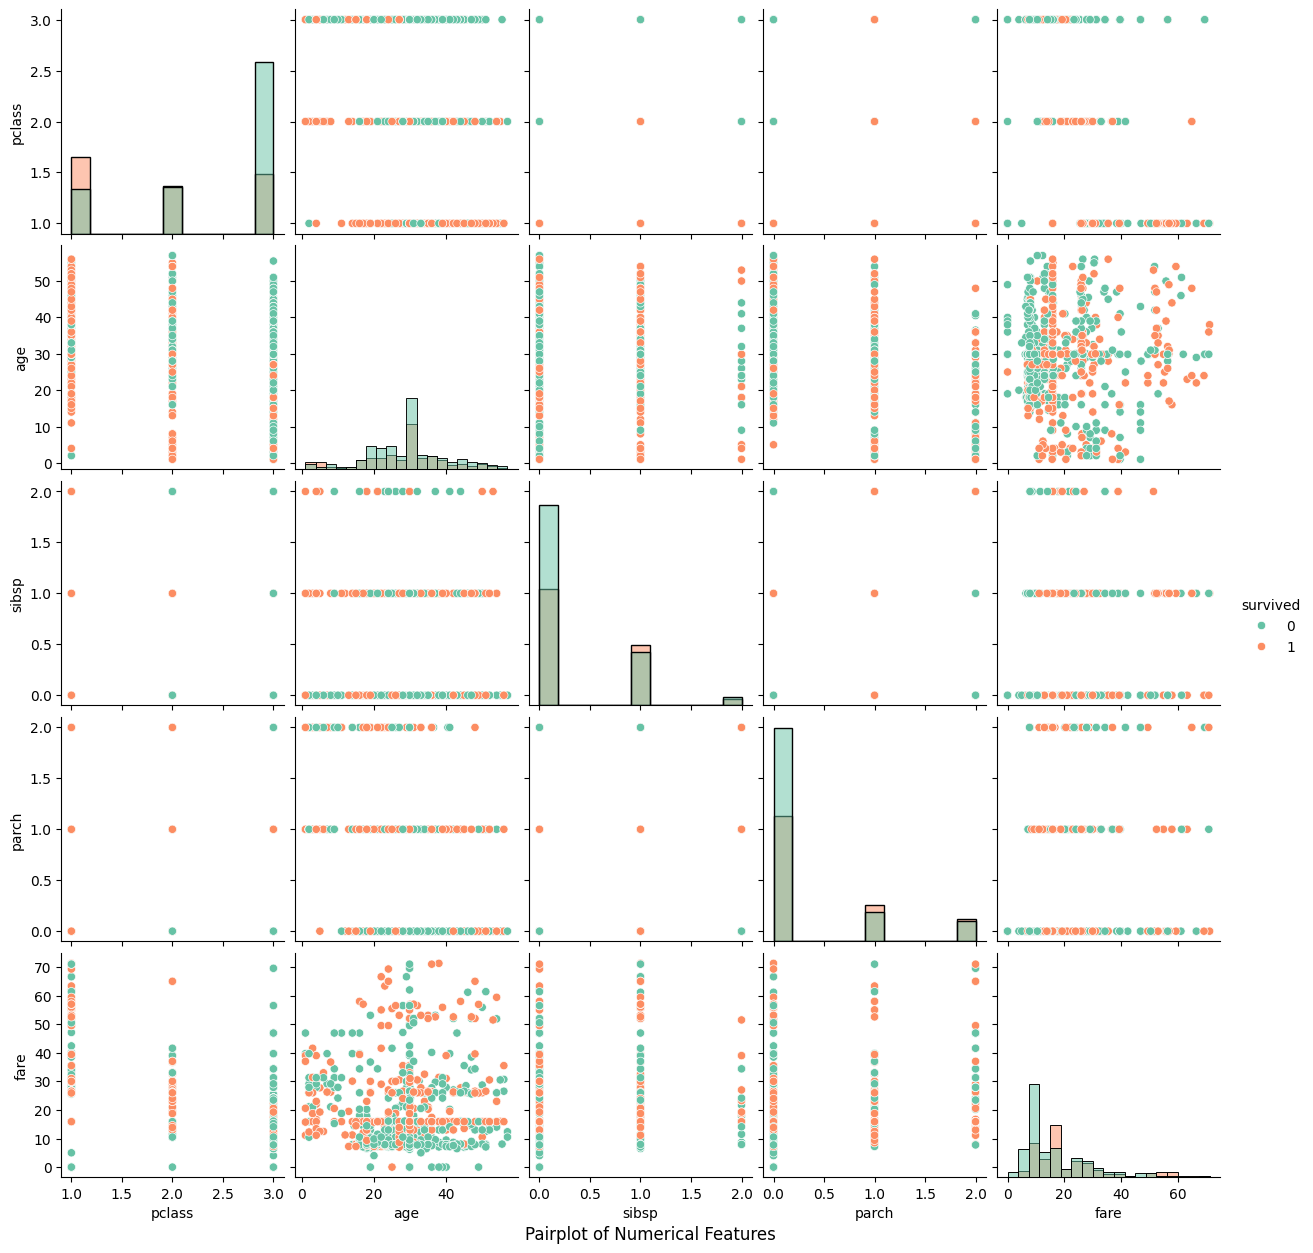

========== Generating Insigits ==========
### Insights From the data:
General Observation:
1. the orange points (Survived = 1) represent passengers who survived.
2. the green points (Survived = 0) represent passengers who did not survived.

### Survival vs passenger class:
1. Survival has a strong correlation with PClass.
2. Passengers in 1st class (Pclass = 1) had much higher survival rate, as seen by concentration by orange points.
3. passengers in 3rd class (Pclass = 3) had much lower survival rate, as seen by the concentration by green points.

### Survival vs Age:
1. Younger Passenger appear more likely to survive.
2. there's a noticeable concentration of orange points for younger age.
3. Older passenger had mixed survival rates, but survival rates decline among very elderly passenger.

### Sibsp (Sibblings / Spouses) and parch (Parents / child)
1. Survival tends to decrease with an increase in Sibsp and Parch
2. Passengers traviling alone or with one family member (SibSp or parch

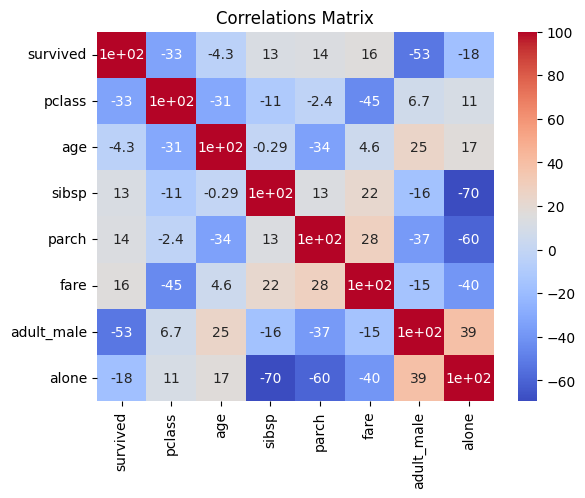

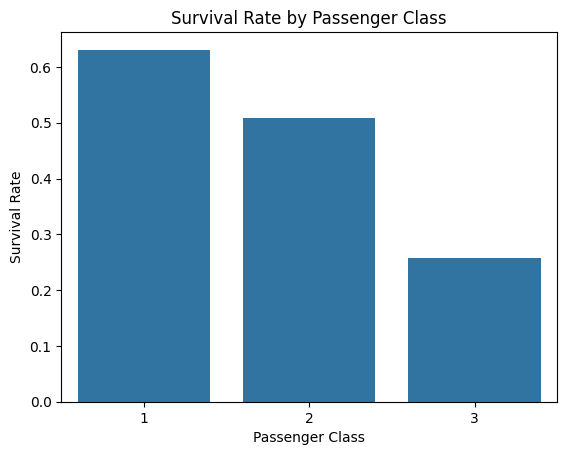

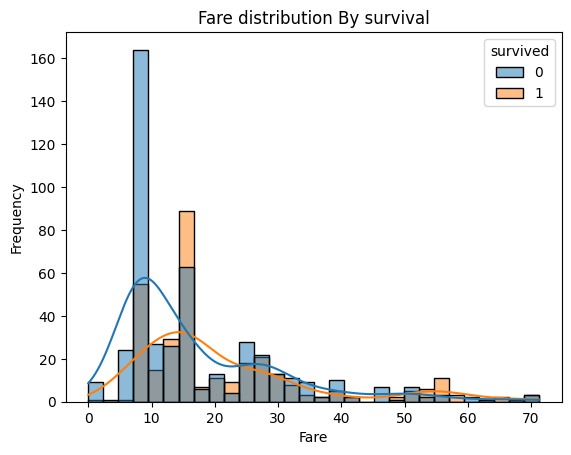

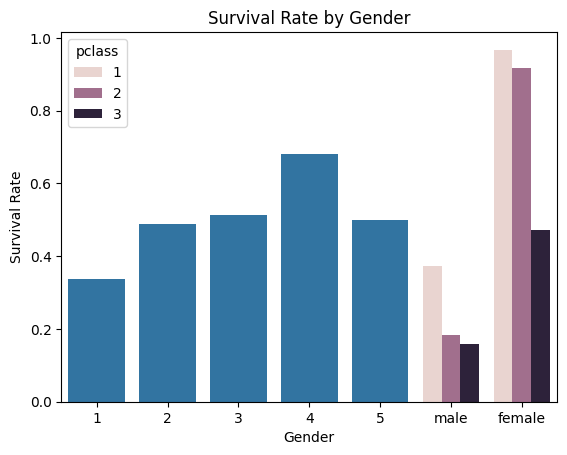

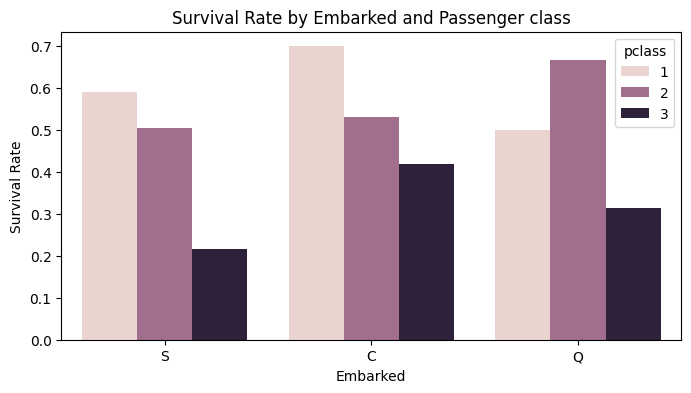

In [ ]:
def eda_function():
    file_name = 'Titanic.csv'
    
    print('='*10,'Understanding Dataset', '='*10)
    data = load_and_describe(file_name)
    if data is None:
        return f'Failed to load the {file_name} file.'
    
    print('='*10,'Data Cleaning and Preprocessing', '='*10)
    clean_df = clean_data(data)
    
    print('='*10,'Identifying Trends', '='*10)
    identifying_Trends(clean_df)
    
    print('='*10,'Generating Insigits', '='*10)
    generating_Insights()
    
    print('='*10,'Presenting Visualizations', '='*10)
    Visualize_data(clean_df)
    

eda_function()